**Plotting Multiplicity Transit-Probability Expectation Values Over Time**

This code produces a specified number of figures which plot the expectation values of "multiplicity transit-probabilities" over time. The data that is used was generated by sysSym and REBOUND. To run, call the "run" function at the end of the file, and specify the range of files for which you wish to generate plots. This range represents a range of indices which correspond to a list of the data files (see the data_files list).

In [668]:
from generate_lib import *
import matplotlib.colors as cls

In [669]:
# Debug flags
SHOW_PLOTS = True
SAVE_PLOTS = False

In [670]:
# Formats the data on the x-axis
def formatter(x, pos):
    return '%1.1f' % (x/1000000.0)

# Plots the data and saves the figure.
def plot_data(data, savename):
    # Initializes the plot
    (fig, ax) = plt.subplots()

    (x, y) = (data['axes']['x'], data['axes']['y'])
    max_planets = data['max_planets']

    # Plots the data
    plt.plot(x, y, label = savename)

    # Labels the plot
    ax.set_title("Multiplicity Expecation Values vs. Time " + "({planets}-Planet System)".format(planets = max_planets), fontsize = 15)
    ax.set_xlabel('Time (Myr)', fontsize = 12)
    ax.set_ylabel('Expectation Value (Dimensionless)', fontsize = 12)

    # Gets the max time on the time axis.
    max_time = np.nanmax(x)

    # Gets the median and mean of the data.
    mean = np.nanmean(y)
    median = np.nanmedian(y)

    # Displays the mean and median lines.
    ax.hlines(mean, 0, max_time, 'orange', label = 'Mean')
    ax.hlines(median, 0, max_time, 'red', label = 'Median')

    # Sets the limits, tick spacing, and label format for the x-axis
    ax.set_xlim(0, max_time)
    ax.xaxis.set_major_locator(tck.LinearLocator(11))
    ax.xaxis.set_major_formatter(tck.FuncFormatter(formatter))

    ax.legend()

    if SHOW_PLOTS:
        plt.show()

    # Saves the figure using a specified path
    if SAVE_PLOTS:
        save_path = os.path.join(os.pardir, 'results', 'exp-values', 'ev_' + savename)
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    
    plt.close()

def loop_value(val, increment, min, max):
    increase = (val + increment)
    
    if increase > max:
        return min + (increase - max)
    elif increase < min:
        return max - (min - increase)
    else:
        return val

# Plots the data and saves the figure.
def multiplot_data(system_name, data, rdata):
    # Initializes the plot
    (fig, axes) = plt.subplots(1, 3, sharey = True, )
    fig.set_size_inches(15, 5)

    #fig = plt.figure(figsize = (12, 12), dpi = 300)

    (x, y) = (data['axes']['x'], data['axes']['y'])
    (rx, ry) = (rdata['axes']['x'], rdata['axes']['y'])        

    if data['max_planets'] != rdata['max_planets']:
        output = 'The data files for {system_name} disagree on system mulitplicity!'.format(system_name = system_name)

        raise Exception(output)
    
    max_planets = data['max_planets']
    max_time = max(np.nanmax(x), np.nanmax(rx))

    # Plots the data
    plt.subplot(1, 3, 1)
    plt.plot(x, y, color = 'red', alpha = 0.8, label = system_name)
    plt.plot(rx, ry, color = 'blue', alpha = 0.8, label = system_name + '_randomO')

    plt.subplot(1, 3, 2)
    plt.plot(x, y, color = 'red')

    plt.subplot(1, 3, 3)
    plt.plot(rx, ry, color = 'blue')

    for col in range(len(axes)):
        ax = axes[col]

        ax.set_xlabel('Time (Myr)', fontsize = 12)

        if col == 0:
            ax.set_ylabel('Expectation Value (Dimensionless)', fontsize = 12)

        ax.set_xlim(0, max_time)
        ax.xaxis.set_major_locator(tck.LinearLocator(11))
        ax.xaxis.set_major_formatter(tck.FuncFormatter(formatter))

        if col == 1:
            mean = np.nanmean(y)
            median = np.nanmedian(y)

            # Displays the mean and median lines.
            ax.hlines(mean, 0, max_time, color = 'orange', label = 'Mean (aligned)', linestyle = 'dashed')
            ax.hlines(median, 0, max_time, color = 'orange', label = 'Median (aligned)')
        elif col == 2:
            mean = np.nanmean(ry)
            median = np.nanmedian(ry)

            # Displays the mean and median lines.
            ax.hlines(mean, 0, max_time, color = 'purple', label = 'Mean (random)', linestyle = 'dashed')
            ax.hlines(median, 0, max_time, color = 'purple', label = 'Median (random)')            
    
    fig.suptitle("Multiplicity Expectation Values vs. Time " + "({planets}-Planet System)".format(planets = max_planets), fontsize = 17)
    fig.legend(bbox_to_anchor = (0.9, 0.6), loc = 'upper left')

    plt.subplots_adjust(wspace=0.1, hspace=0)

    if SHOW_PLOTS:
        plt.show()

    # Saves the figure using a specified path
    if SAVE_PLOTS:
        save_path = os.path.join(os.pardir, 'results', 'exp-values', 'ev_' + system_name)
        fig.savefig(save_path, bbox_inches="tight", dpi=300)
    
    plt.close()

In [671]:
# Runs the code over the specified range of files. The index range corresponds to indexes of the
# data_files list, which contains each of the data file names.
def run():
    for idx in range(0, 30, 2):
        suffix = '_randomO'
        system_name = data_files[idx].replace(suffix, '').replace('.csv', '')

        p = os.path.join(os.pardir, 'data', system_name + '.csv')
        rp = os.path.join(os.pardir, 'data', system_name + suffix + '.csv')

        (data, rdata) = (get_data(p), get_data(rp))

        multiplot_data(system_name, data, rdata)

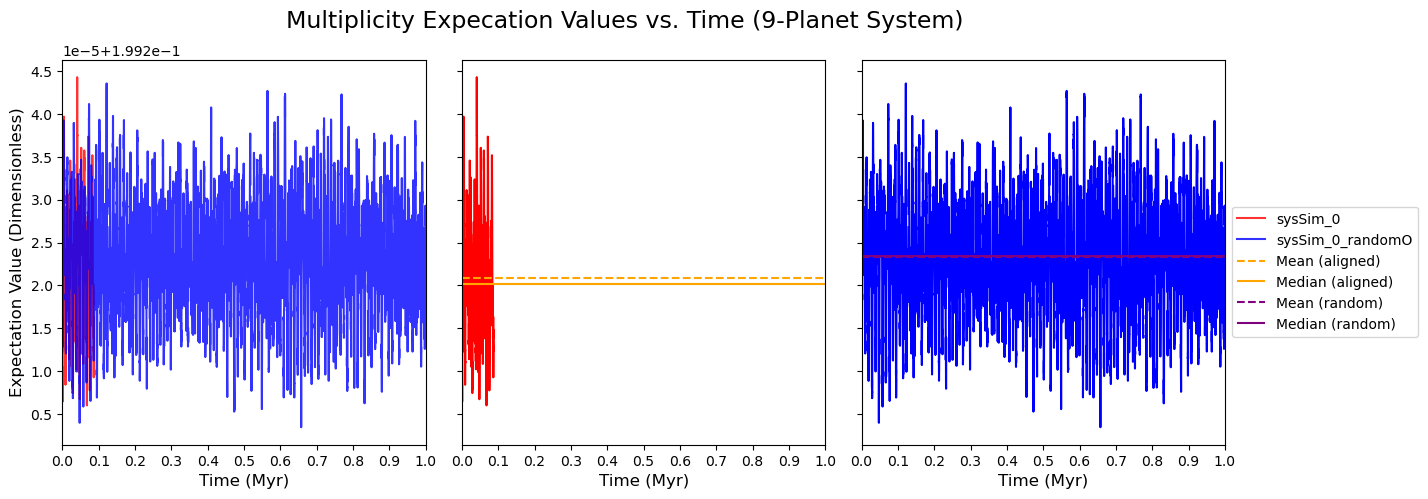

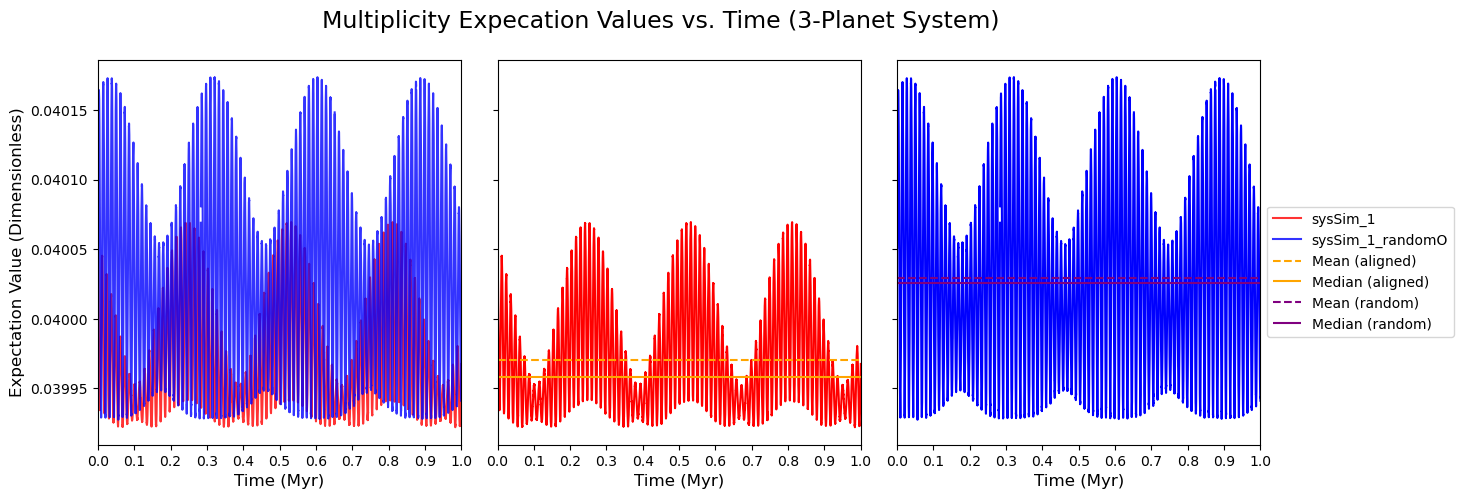

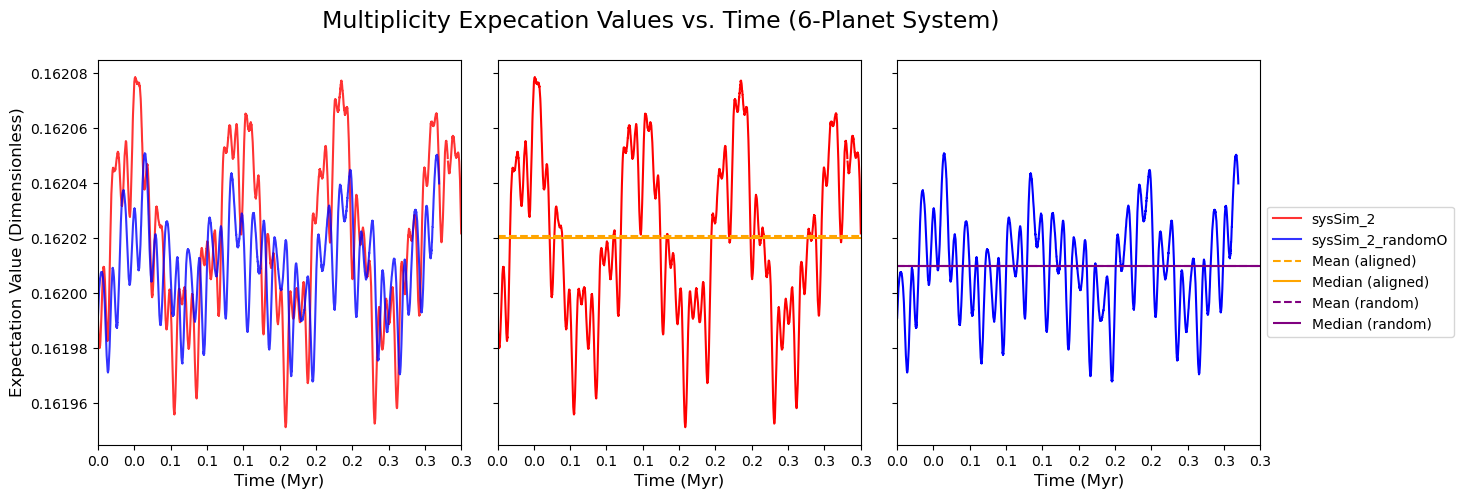

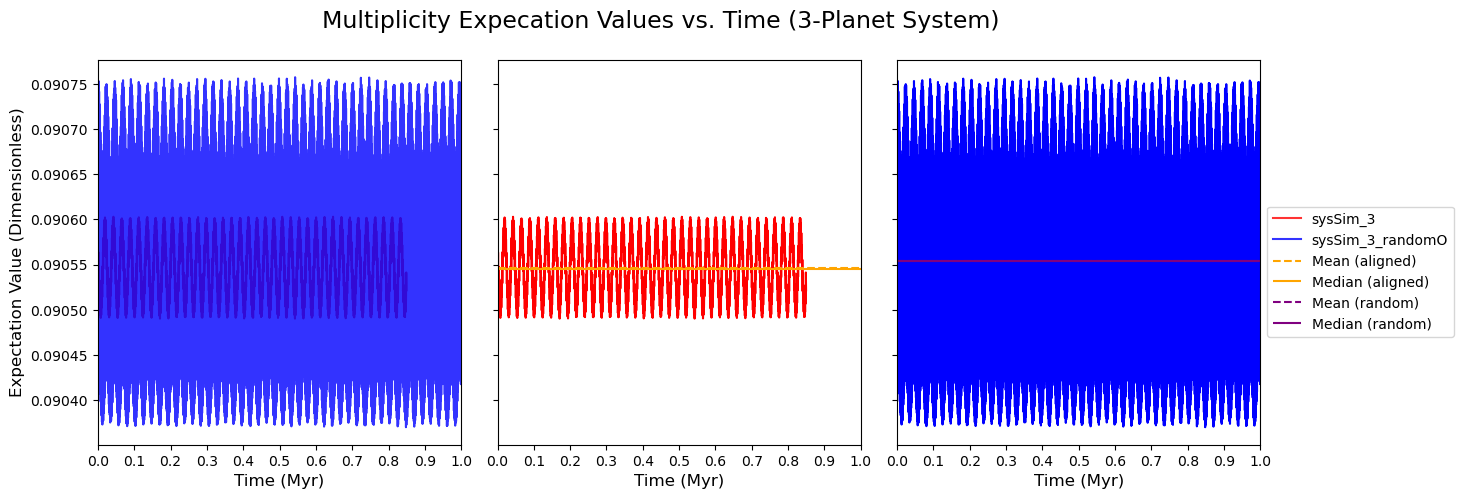

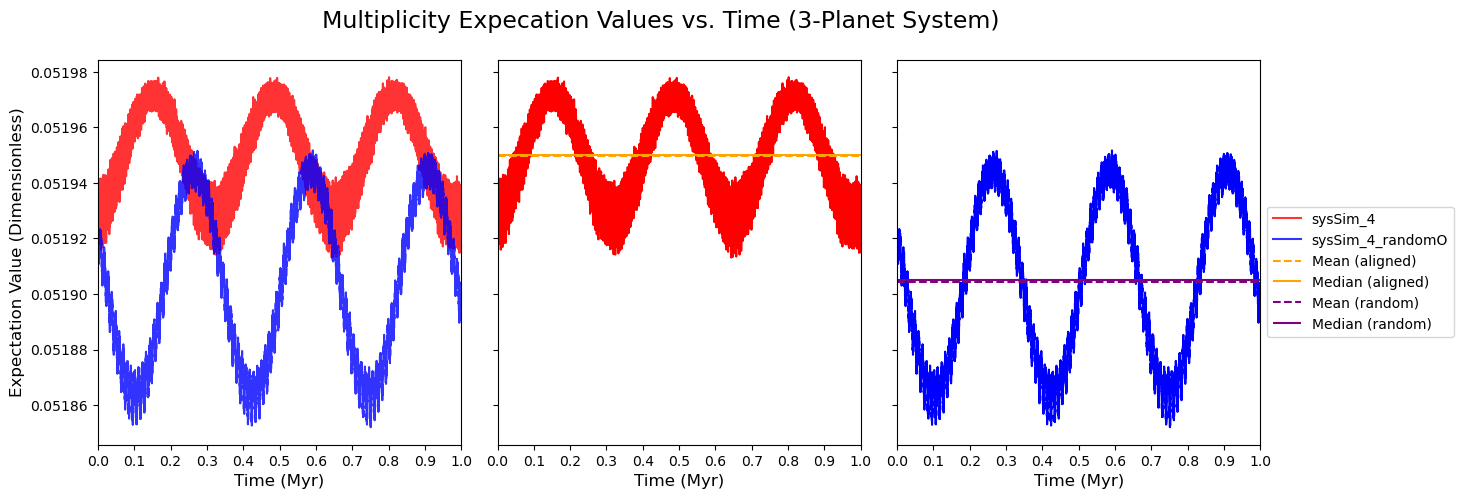

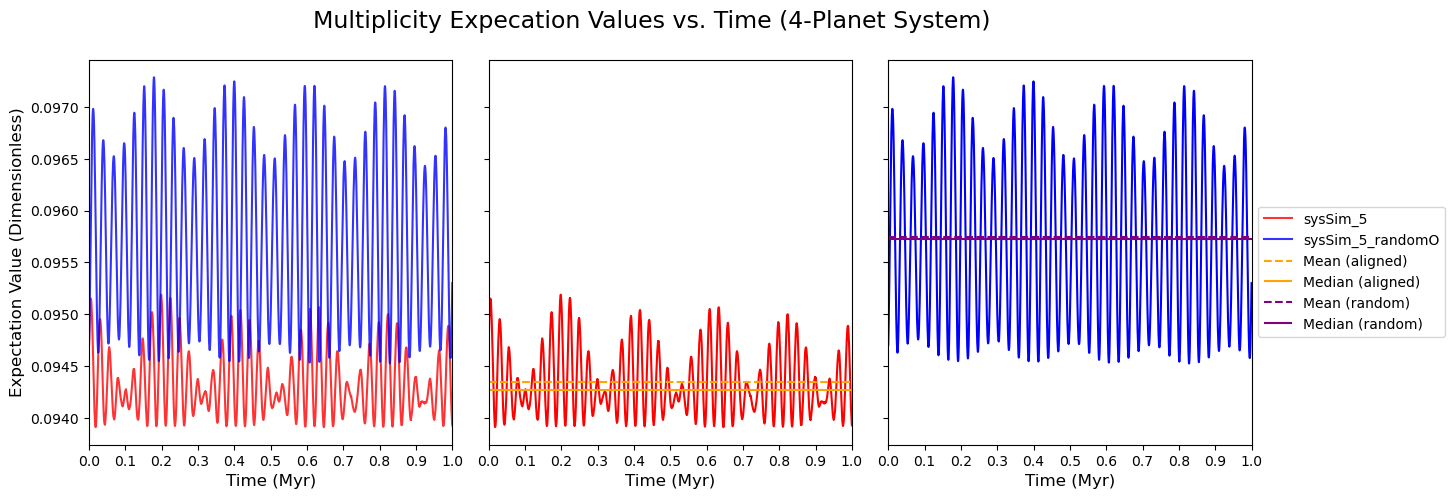

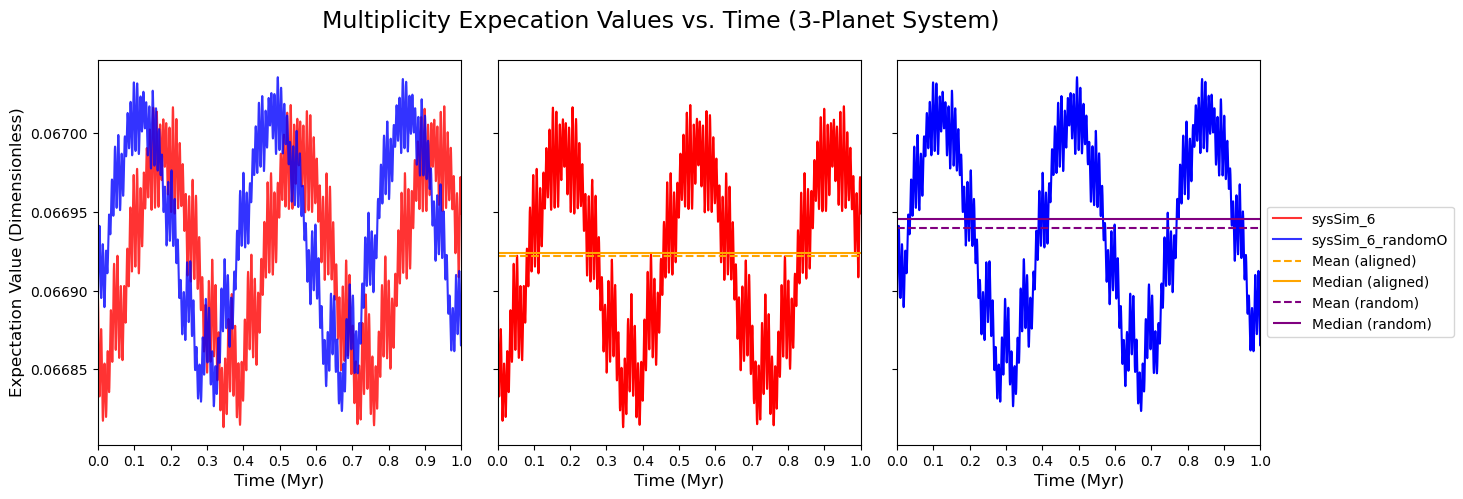

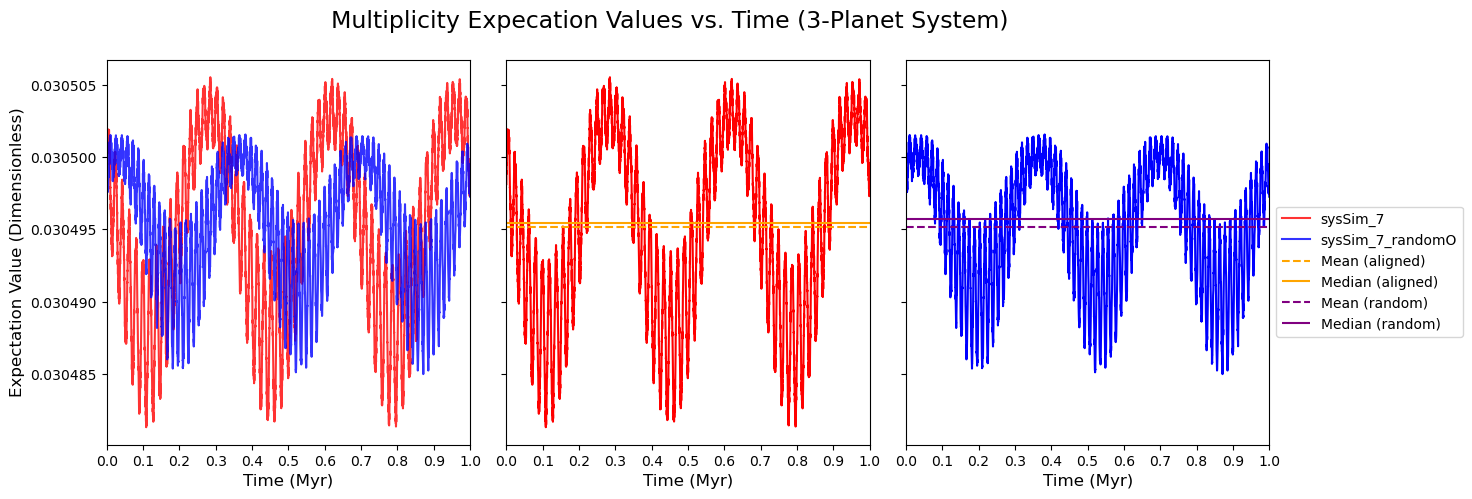

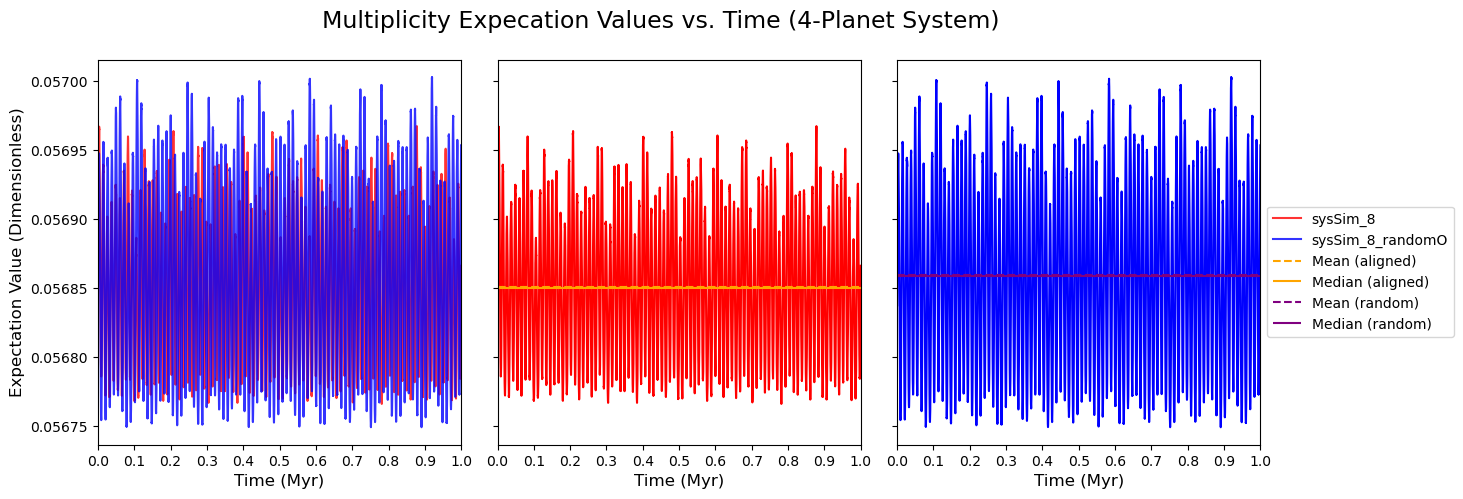

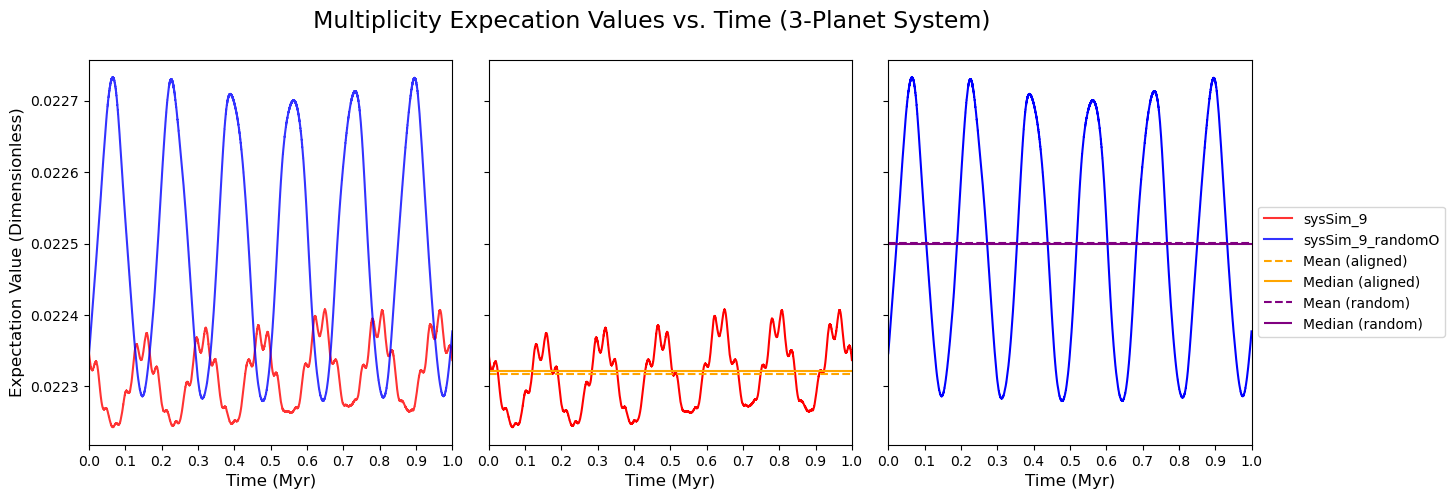

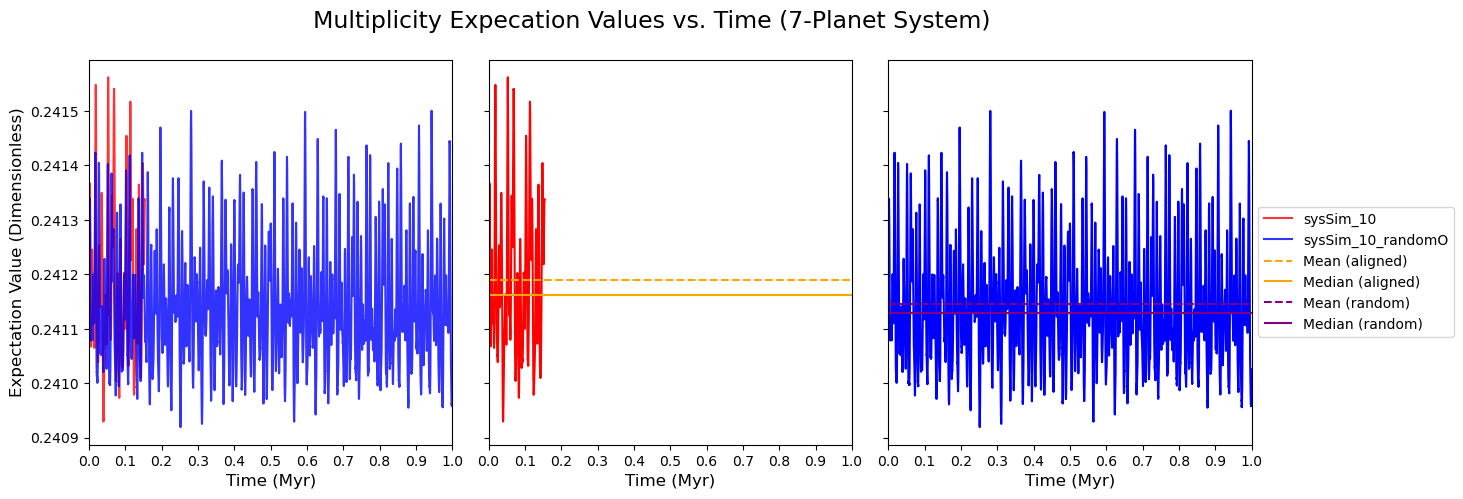

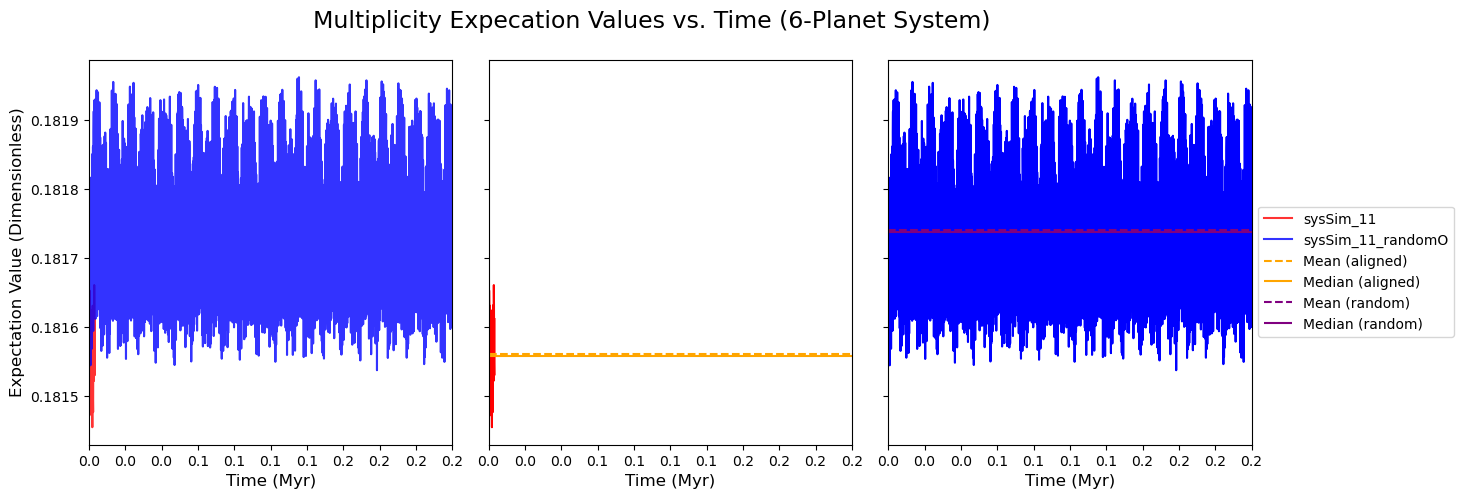

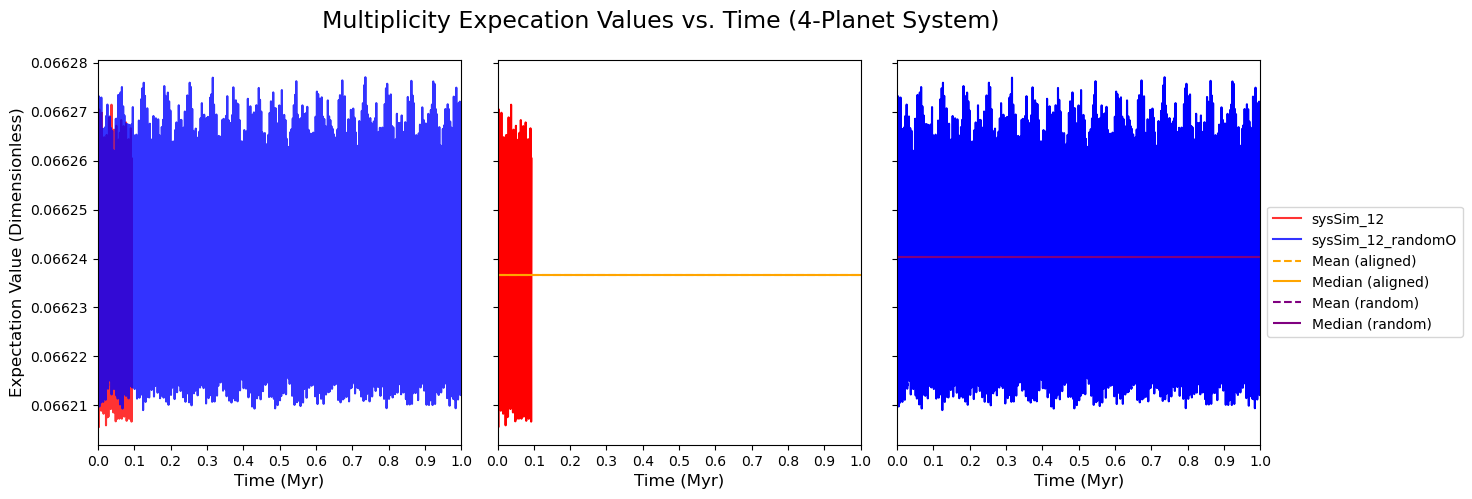

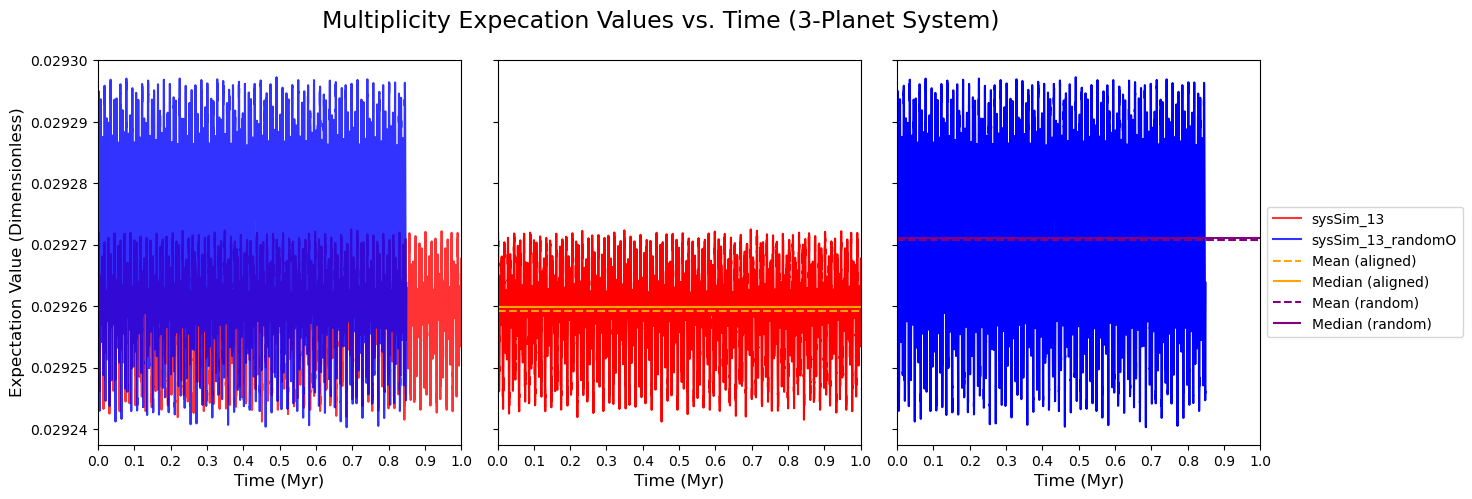

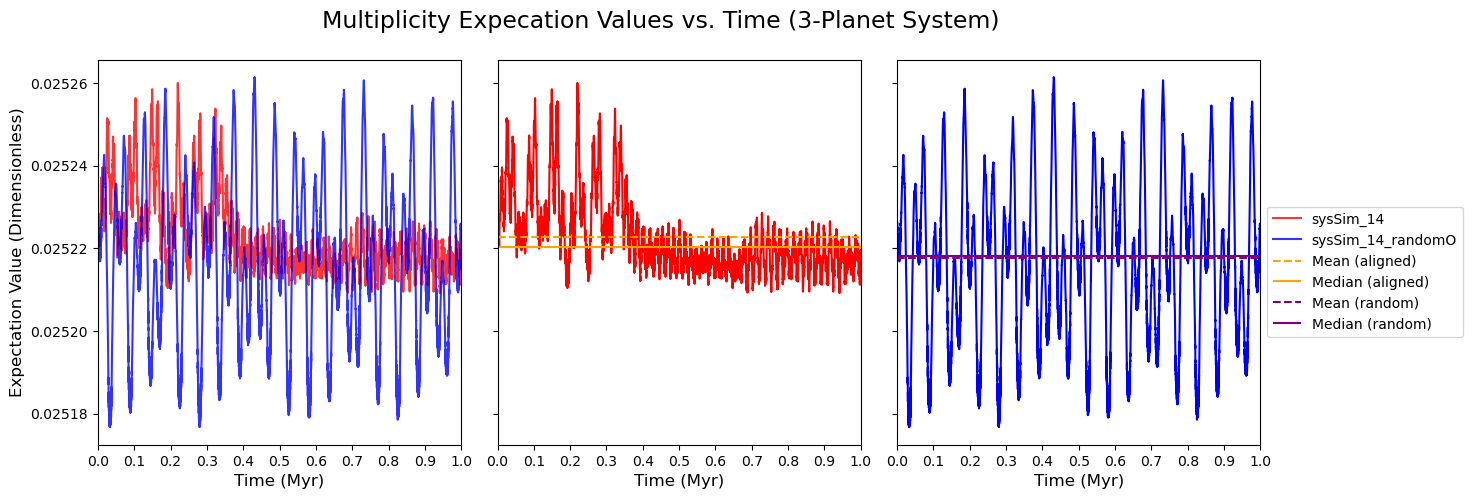

In [672]:
run()